In [2]:
import csv

key_ds1 = ['time', 'T_motor']
key_ds2 = ['time', 'mdot_hot']

ds = {**{k:[] for k in key_ds1}}
ds2 = {**{k:[] for k in key_ds2}}

with open('data/Viv_2021_near_DP_T_motor.csv', newline='') as data_file:
    reader = csv.DictReader(data_file)
    
    for row in reader:
        for k in key_ds1:
            v = float(row[k])
            ds[k].append(v)
      
with open('data/Viv_2021_near_DP_mdot_hot.csv', newline='') as data_file:
    reader = csv.DictReader(data_file)
    
    for row in reader:
        for k in key_ds2:
            v = float(row[k])
            ds2[k].append(v)      

No handles with labels found to put in legend.
No handles with labels found to put in legend.


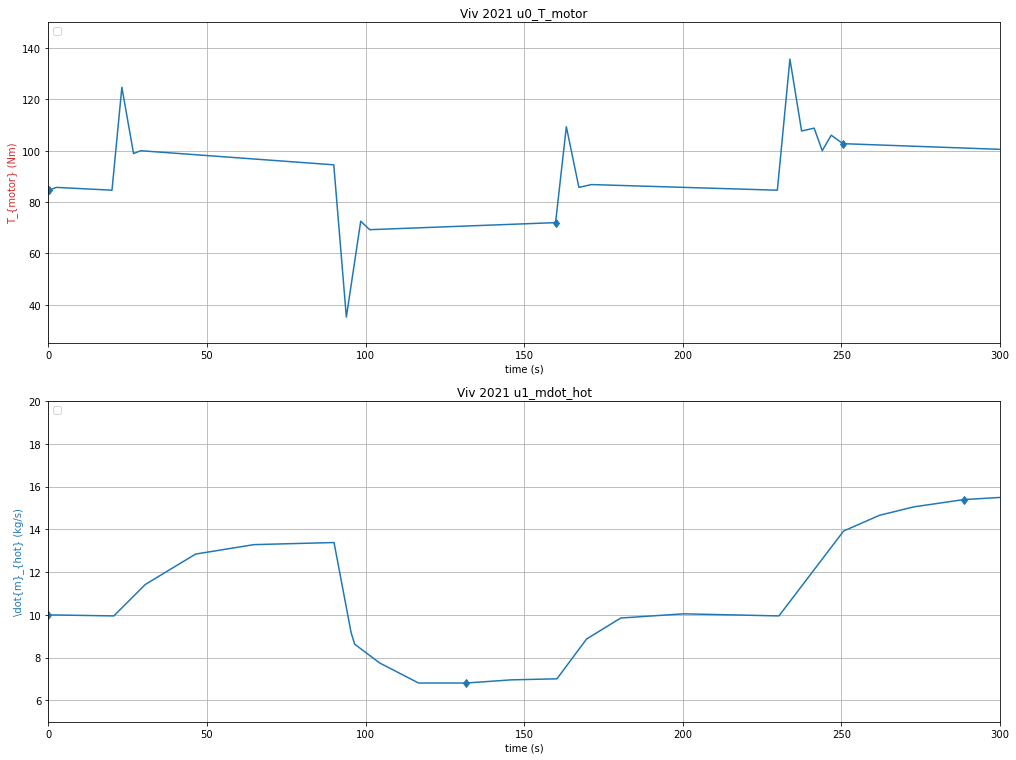

In [3]:
import matplotlib # kernel for proper conda env required. 
import matplotlib.pyplot as plt
import numpy as np

px = 1 / plt.rcParams['figure.dpi'] # pixel in inches
fig, axs = plt.subplots(2, 1, figsize=(1024*px, 768*px))
dict_line = {}

# plot the mock input
# l, = ax.plot(ds_mock['time_mock'], ds_mock['HotOil_Evap_in_T'], '-*',markevery=1200)
   
color = 'tab:red'    
axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('T_{motor} (Nm)', color=color)
axs[0].set_ylim([25,150])
axs[0].set_xlim([0, 300])
axs[0].set_title("Viv 2021 u0_T_motor")
axs[0].grid()
axs[0].legend(loc='upper left')

for k in ['T_motor']:
    l, = axs[0].plot(ds['time'], ds[k],'-d',markevery=10, label=k)
    dict_line[k]  = l

color = 'tab:blue'    
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('\dot{m}_{hot} (kg/s)', color=color)
axs[1].set_ylim([5, 20])
axs[1].set_xlim([0, 300])
axs[1].set_title("Viv 2021 u1_mdot_hot")
axs[1].grid()
axs[1].legend(loc='upper left')

for k in ['mdot_hot']:
    l, = axs[1].plot(ds2['time'], ds2[k],'-d',markevery=10, label=k)
    dict_line[k]  = l    
    
    
# fig.legend(dict_line.values() ,dict_line.keys(), 'upper right')
fig.tight_layout()
fig.patch.set_facecolor((1, 1, 1))

fig.savefig("test2.png")
plt.show()